In [1]:
from game import *
from policy import *
from simulator import *

c:\Users\zhufe\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Benchmark

In [2]:
Evaluator(policy = Benchmark()).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:02<00:00, 36987.04it/s]


-0.09984

# MC Bootstrap

In [3]:
mc_policy = Easy21Policy()
mc_simulator = MonteCarloSimulator(policy = mc_policy)
mc_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [01:43<00:00, 966.14it/s]


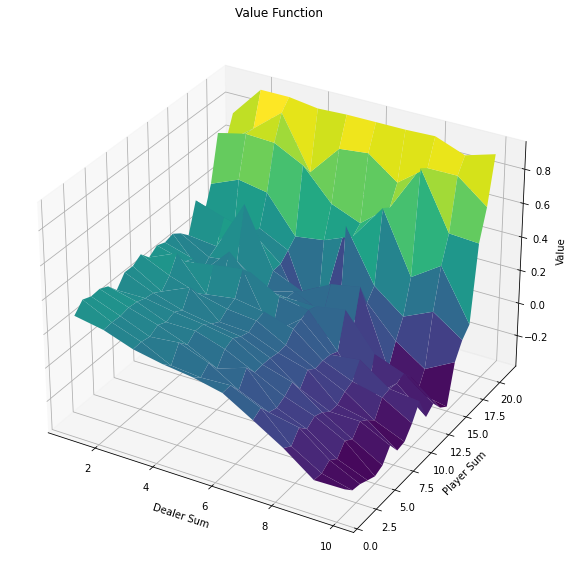

In [4]:
mc_policy.plot_value_function()

In [5]:
Evaluator(policy = mc_policy).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:04<00:00, 21318.76it/s]


0.0487

# SARSA Bootstrap

In [6]:
sarsa_policy = Easy21Policy()
sarsa_simulator = SARSALambdaSimulator(
    policy = sarsa_policy, 
    lambda_ = 0.5
    )
sarsa_simulator.run(num_episodes = 50000)

100%|██████████| 50000/50000 [00:03<00:00, 13646.80it/s]


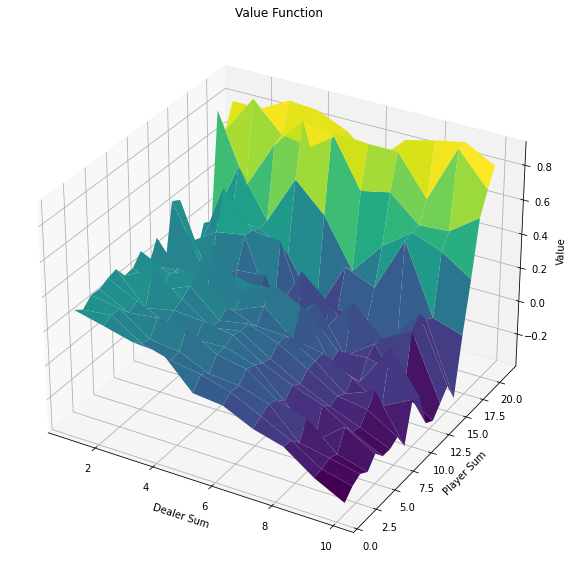

In [7]:
sarsa_policy.plot_value_function()

In [8]:
Evaluator(policy = sarsa_policy).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:04<00:00, 20680.43it/s]


0.05043

# Linear Approximation

In [9]:
approx_model = Easy21ActionValueApproximation()
approx_simulator = ApproximationSimulator(
model = approx_model, 
lambda_ = 0.5, 
learning_rate = 0.001
)
approx_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [00:50<00:00, 1994.05it/s]


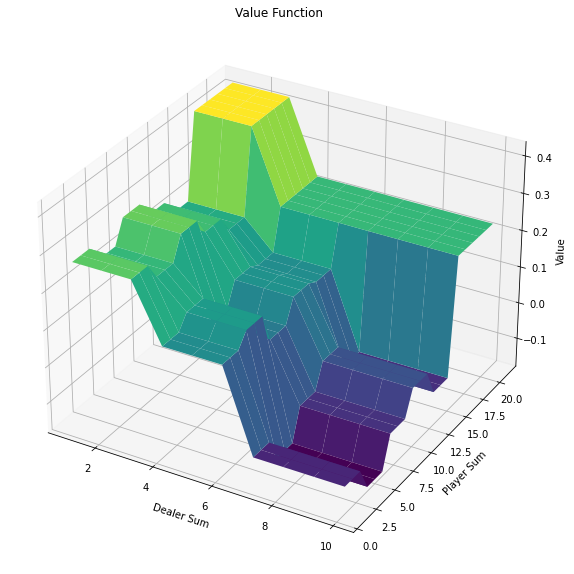

In [10]:
approx_model.plot_value_function()

In [11]:
Evaluator(policy = approx_model).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:17<00:00, 5657.84it/s]


0.04808

# REINFORCE

In [12]:
policy_approx_model = Easy21PolicyApproximation()
reinforce_simulator = REINFORCESimulator(model = policy_approx_model, learning_rate = 0.01)
reinforce_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [02:56<00:00, 566.35it/s]


In [13]:
Evaluator(policy = policy_approx_model).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:13<00:00, 7351.73it/s]


0.0461

# Actor-Critic

In [22]:
actor_model = Easy21PolicyApproximation()
critic_model = Easy21ActionValueApproximation()
actor_critic_simulator = ActorCriticSimulator(
    actor_model = actor_model, 
    critic_model = critic_model, 
    lambda_ = 0.5, 
    actor_learning_rate = 0.01, 
    critic_learning_rate=0.001
    )
actor_critic_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [01:18<00:00, 1266.33it/s]


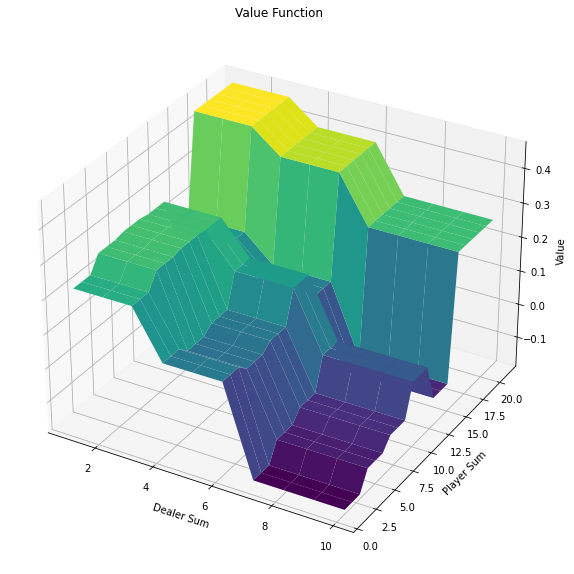

In [23]:
critic_model.plot_value_function()

In [24]:
Evaluator(policy = actor_model).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:13<00:00, 7166.19it/s]


0.02486

# Advantage

In [17]:
advantage_actor_model = Easy21PolicyApproximation()
advantage_critic_model = Easy21StateValueApproximation()
advantage_simulator = AdvantageSimulator(
    actor_model = advantage_actor_model, 
    critic_model = advantage_critic_model, 
    lambda_ = 0, 
    actor_learning_rate = 0.01, 
    critic_learning_rate=0.01
    )
advantage_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [01:14<00:00, 1335.22it/s]


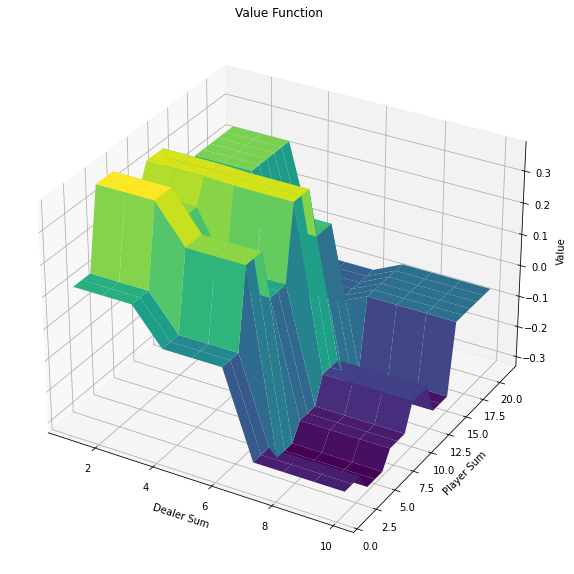

In [18]:
advantage_critic_model.plot_value_function()

In [19]:
Evaluator(policy = advantage_actor_model).evaluate(num_episodes = 10000)

100%|██████████| 10000/10000 [00:01<00:00, 8223.69it/s]


0.0377